In [29]:
import pandas as pd
import numpy as np
import datetime as dt

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Scaling the data
from sklearn.preprocessing import StandardScaler

#split the data into training and testing dataset
from sklearn.model_selection import train_test_split

# ML Alogrithms for Training the model
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [30]:
df=pd.read_excel('sales_data.xlsx')

In [35]:
df.head()


,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

#### There are No Missing value 

In [33]:
df.describe()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,1.75440,...,421.826908,474.462852,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710
std,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,2.43394,...,643.449120,617.579321,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248
min,1.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,0.00000,...,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000
50%,13765.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,1.00000,...,194.990000,264.485000,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000
75%,71891.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,3.00000,...,604.085000,651.487500,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500
max,277160.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,23.00000,...,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


# RFM Model

In [34]:
df_recency = df.groupby(by='CustomerID',
as_index=False)['FIRST_ORDER_DATE'].max()
df_recency.columns = ['CustomerID', 'LATEST_ORDER_DATE']
recent_date = df_recency['LATEST_ORDER_DATE'].max()
df_recency['Recency'] = df_recency['LATEST_ORDER_DATE'].apply(
lambda x: (recent_date - x).days)
df_recency.head()


,CustomerID,LATEST_ORDER_DATE,Recency
0,1,2020-03-03,600
1,2,2019-02-13,984
2,3,2018-02-15,1347
3,4,2016-10-01,1849
4,5,2015-12-27,2128


In [7]:
frequency_df = df.drop_duplicates().groupby(
by=['CustomerID'], as_index=False)['FIRST_ORDER_DATE'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()


,CustomerID,Frequency
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [8]:
df['Total'] = df['REVENUE']*df['TOTAL_ORDERS']
monetary_df = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()


,CustomerID,Monetary
0,1,2125691.40
1,2,1916731.82
2,3,1281485.41
3,4,1558577.16
4,5,439009.74


In [9]:
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(
columns='LATEST_ORDER_DATE')
rfm_df.head()


,CustomerID,Recency,Frequency,Monetary
0,1,600,1,2125691.40
1,2,984,1,1916731.82
2,3,1347,1,1281485.41
3,4,1849,1,1558577.16
4,5,2128,1,439009.74


In [10]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.tail()


,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
4995,248709,2486,1,119.90,19.274169,100.0,50.01
4996,248710,2507,1,119.88,17.850971,100.0,50.01
4997,259042,2640,1,103.88,11.090780,100.0,50.01
4998,266024,2536,1,91.88,14.577615,100.0,50.01
4999,277160,2529,1,115.50,15.075734,100.0,50.01


In [11]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(7)


,CustomerID,RFM_Score
0,1,3.27
1,2,3.18
2,3,3.10
3,4,3.03
4,5,3.01
5,6,2.98
6,7,3.06


In [12]:
def camp_pd_na(customer):
    TO=customer['RFM_Score']
    if TO>=3.2:
        return 'champions'
        
            
    elif TO <3.2 and TO>=3:
         return 'Potential customers'
    else:
        return 'need attention'
rfm_df['CUSTOMER_SEGMENTS']=rfm_df.apply(camp_pd_na,axis=1)   
#If customers's RFM_Score is more/equal to 3.2 then it is a 'Champions', If RFM_Scorelies between 3.2 to 3 then it is a 'Potential customers'
#If RFM_Score lies below 3 then it is in a 'need attention' type
# Then I have created another column called CUSTOMER_Segments to store the result of this function. 
            
        

In [13]:

rfm_df

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,CUSTOMER_SEGMENTS
0,1,600,1,2125691.40,59.03,100.0,50.01,3.27,champions
1,2,984,1,1916731.82,47.17,100.0,50.01,3.18,Potential customers
2,3,1347,1,1281485.41,37.29,100.0,50.01,3.10,Potential customers
3,4,1849,1,1558577.16,27.03,100.0,50.01,3.03,Potential customers
4,5,2128,1,439009.74,24.36,100.0,50.01,3.01,Potential customers
...,...,...,...,...,...,...,...,...,...
4995,248709,2486,1,119.90,19.27,100.0,50.01,2.97,need attention
4996,248710,2507,1,119.88,17.85,100.0,50.01,2.96,need attention
4997,259042,2640,1,103.88,11.09,100.0,50.01,2.91,need attention
4998,266024,2536,1,91.88,14.58,100.0,50.01,2.93,need attention


# EDA

In [14]:
rfm_df['CUSTOMER_SEGMENTS'].value_counts()

champions              2576
Potential customers    1312
need attention         1112
Name: CUSTOMER_SEGMENTS, dtype: int64

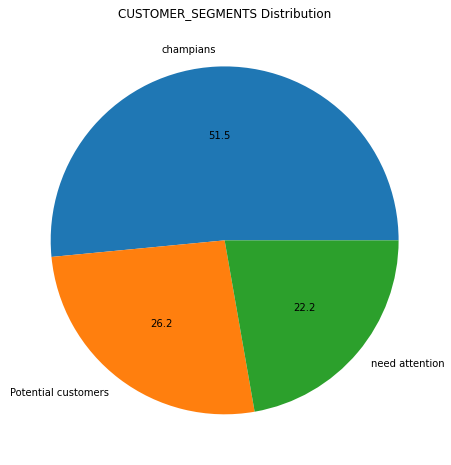

In [15]:
plt.figure(figsize=(8,8))
plt.pie(rfm_df['CUSTOMER_SEGMENTS'].value_counts(),labels=["champians","Potential customers","need attention",],autopct='%.1f')


plt.title("CUSTOMER_SEGMENTS Distribution")
plt.show()

### Above you can see 22.2% customers lies in need attention category while 26.2% are Potential customers and almost 51.5% customers are Champians

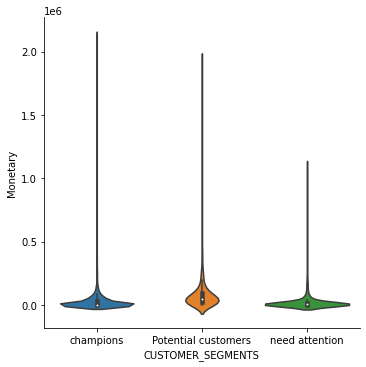

In [16]:
sns.catplot(x='CUSTOMER_SEGMENTS',y='Monetary',kind='violin',data=rfm_df)

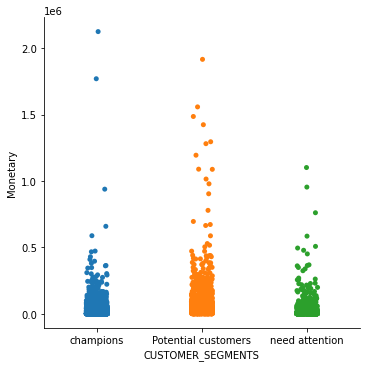

In [17]:
sns.catplot(x='CUSTOMER_SEGMENTS',y='Monetary',data=rfm_df)

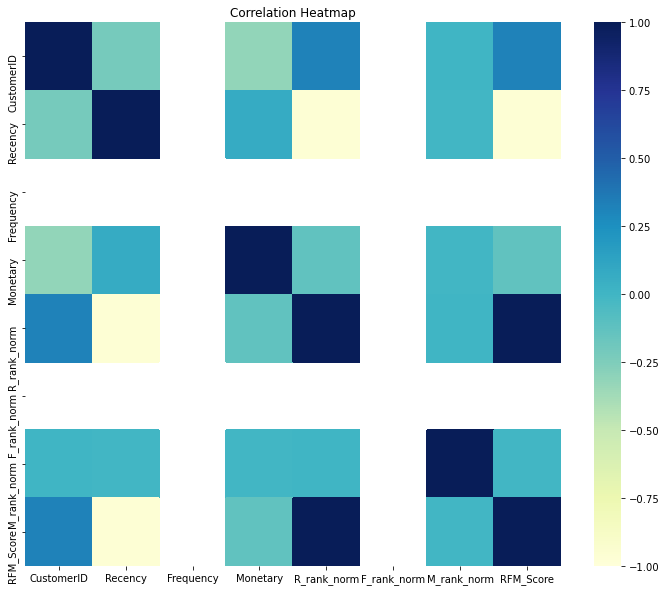

In [18]:
corr_df=rfm_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_df,vmin=-1.0,cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

# Preprocessing

In [19]:
df.drop(['CustomerID','FIRST_ORDER_DATE','LATEST_ORDER_DATE'],axis=1,inplace=True) 

In [20]:
df

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,...,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Total
0,124,11986.54,96.67,529.59,4.27,14.19,1,13,13,29,...,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44,1486330.96
1,82,11025.96,134.46,97.92,1.19,15.89,1,11,13,10,...,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55,904128.72
2,43,7259.69,168.83,171.69,3.99,33.12,1,5,4,3,...,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80,312166.67
3,44,6992.27,158.92,92.82,2.11,21.11,1,10,8,5,...,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23,307659.88
4,55,6263.44,113.88,179.04,3.26,6.65,1,2,3,8,...,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50,344489.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,117.49,117.49,4.99,4.99,0.00,207,0,0,0,...,0.00,0,0,0,1,0.00,0.00,0.00,117.49,117.49
4996,1,117.49,117.49,4.99,4.99,0.00,207,0,0,0,...,0.00,0,0,0,1,0.00,0.00,0.00,117.49,117.49
4997,1,117.49,117.49,4.99,4.99,0.00,207,0,0,0,...,0.00,0,0,0,1,0.00,0.00,0.00,117.49,117.49
4998,1,117.49,117.49,4.99,4.99,0.00,207,0,0,0,...,0.00,0,0,1,0,0.00,0.00,117.49,0.00,117.49


In [21]:
def preprocessing_inputs(df,scaler):
    df=df.copy()
    
    y=df['Total'].copy()
    x=df.drop('Total',axis=1).copy()
    
    x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
    return x,y

In [22]:
x,y=preprocessing_inputs(df, StandardScaler())

In [23]:
x

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,8.765123,5.156585,-0.435032,10.100455,0.335167,-0.573680,-1.078249,5.084778,4.620789,11.036955,...,3.373336,3.133914,5.046286,12.182270,6.456015,2.256629,2.828196,6.575549,4.142948,1.141831
1,5.452458,4.675915,-0.022668,1.083744,-1.188711,-0.567134,-1.078249,4.190437,4.620789,3.327884,...,3.708252,5.881172,-0.013247,1.968992,3.878843,8.804795,-0.304334,3.367543,2.015318,6.953570
2,2.376412,2.791290,0.352376,2.624650,0.196633,-0.500781,-1.078249,1.507412,0.922711,0.487700,...,0.454025,3.866185,-0.473204,0.479556,1.499914,4.657623,-0.395653,0.280266,2.457293,4.725614
3,2.455285,2.657474,0.244239,0.977215,-0.733527,-0.547032,-1.078249,3.743266,2.566301,1.299181,...,0.894011,1.272218,-0.473204,1.330662,1.698158,3.784534,-0.395653,1.802553,1.790974,3.470760
4,3.322887,2.292771,-0.247237,2.778176,-0.164546,-0.602717,-1.078249,0.165900,0.511814,2.516403,...,3.580801,0.476095,2.286541,1.117886,4.473575,2.038357,1.117797,0.901154,3.009214,1.454088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.936254,-0.782636,-0.207845,-0.857376,0.691399,-0.628326,1.491981,-0.728441,-0.720879,-0.729522,...,-0.655637,-0.768339,-0.473204,-0.797104,-0.879014,-0.580910,-0.395653,-0.617103,-0.727089,-0.486263
4996,-0.936254,-0.782636,-0.207845,-0.857376,0.691399,-0.628326,1.491981,-0.728441,-0.720879,-0.729522,...,-0.655637,-0.768339,-0.473204,-0.797104,-0.879014,-0.580910,-0.395653,-0.617103,-0.727089,-0.486263
4997,-0.936254,-0.782636,-0.207845,-0.857376,0.691399,-0.628326,1.491981,-0.728441,-0.720879,-0.729522,...,-0.655637,-0.768339,-0.473204,-0.797104,-0.879014,-0.580910,-0.395653,-0.617103,-0.727089,-0.486263
4998,-0.936254,-0.782636,-0.207845,-0.857376,0.691399,-0.628326,1.491981,-0.728441,-0.720879,-0.729522,...,-0.655637,-0.768339,-0.473204,-0.797104,-0.680770,-0.799182,-0.395653,-0.617103,-0.580995,-0.644356


# Traing & Testing the data

In [24]:
#Total is are target column
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [25]:
RFC=RandomForestRegressor()
RFC.fit(x_train,y_train)
print("Random Forest Accuracy: {:.2f}%".format(RFC.score(x_test,y_test)*100))

Random Forest Accuracy: 92.31%


In [26]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
print("Decision Tree:{:.2f}".format(DT.score(x_test,y_test)*100))

Decision Tree:93.48


In [27]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print("Decision Tree:{:.2f}".format(LR.score(x_test,y_test)*100))

Decision Tree:79.38


In [28]:
classifier=xgb.XGBRegressor()
classifier.fit(x_train,y_train)
print("XGBoost Accuracy:{:.2f}".format(classifier.score(x_test,y_test)*100))

XGBoost Accuracy:98.36


## As you can See Above I am getting an Accuracy of almost 98.36% form XGBoost which is a good score.